In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages (0.21.3)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [14]:
print(sklearn.__version__)

0.21.3


In [15]:
print(np.__version__)

1.17.0


In [18]:
print(pd.__version__)
print(sns.__version__)


0.25.0
0.9.0


In [19]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
348,37.7,4,89.0,62,2050,17.3,81,3,toyota tercel
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
158,16.0,8,318.0,150,4498,14.5,75,1,plymouth grand fury


In [30]:
automobile_df.shape

(398, 9)

In [31]:
automobile_df = automobile_df.replace('?', np.nan)

In [32]:
automobile_df = automobile_df.dropna()

In [33]:
automobile_df.shape

(392, 9)

#### Drop columns which don't make sense as features

In [34]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [35]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
98,32.0,4,135.0,84,2295,11.6,82
116,15.0,8,318.0,150,4135,13.5,72
262,26.4,4,140.0,88,2870,18.1,80
242,26.0,4,121.0,113,2234,12.5,70
330,30.0,4,98.0,68,2155,16.5,78


#### Convert to a complete year format

In [36]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [37]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
303,27.0,4,151.0,90,2950,17.3,1982
297,26.8,6,173.0,115,2700,12.9,1979
89,35.7,4,98.0,80,1915,14.4,1979
371,14.0,8,351.0,153,4129,13.0,1972
131,27.0,4,101.0,83,2202,15.3,1976


#### Add an age column

In [38]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [39]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [40]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
312,30.7,6,145.0,76,3160,19.6,38
139,33.8,4,97.0,67,2145,18.0,39
344,12.0,8,400.0,167,4906,12.5,46
273,22.0,6,198.0,95,2833,15.5,49
293,25.0,4,140.0,75,2542,17.0,45


In [41]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [42]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [43]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,43.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,37.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,40.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,43.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,46.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,49.000000


### Visualizing relationships

Text(0, 0.5, 'Miles per gallon')

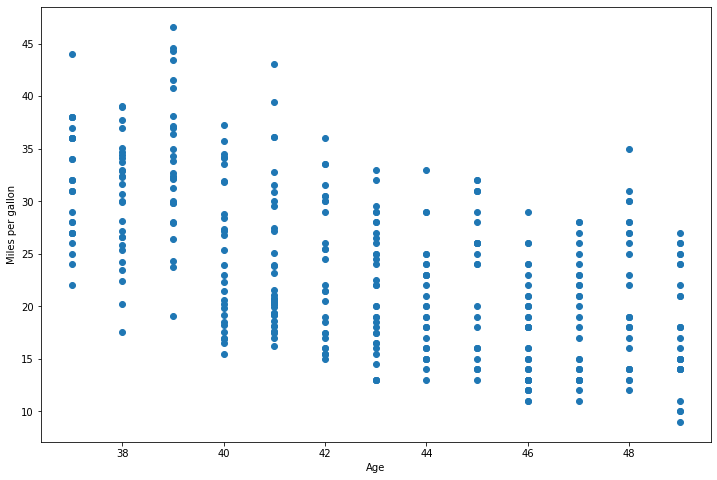

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

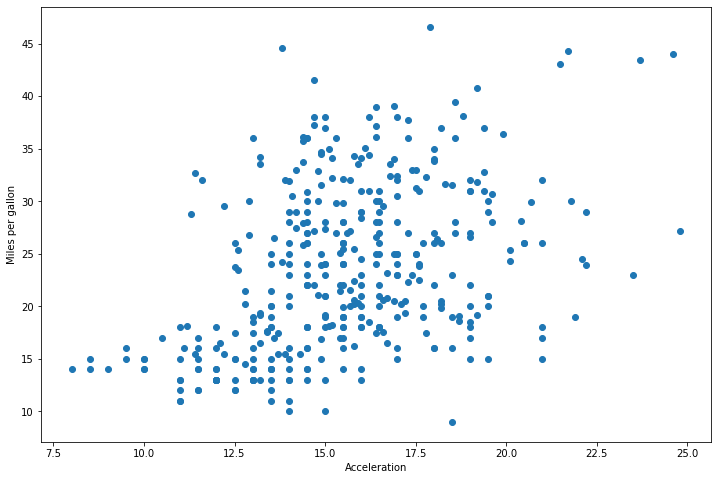

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

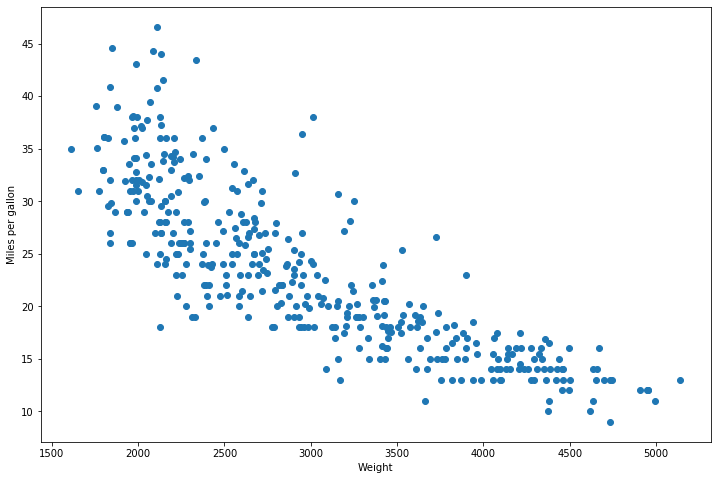

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

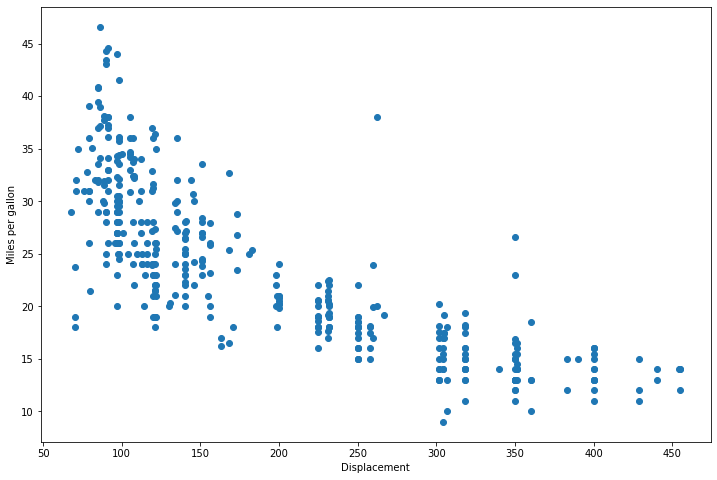

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

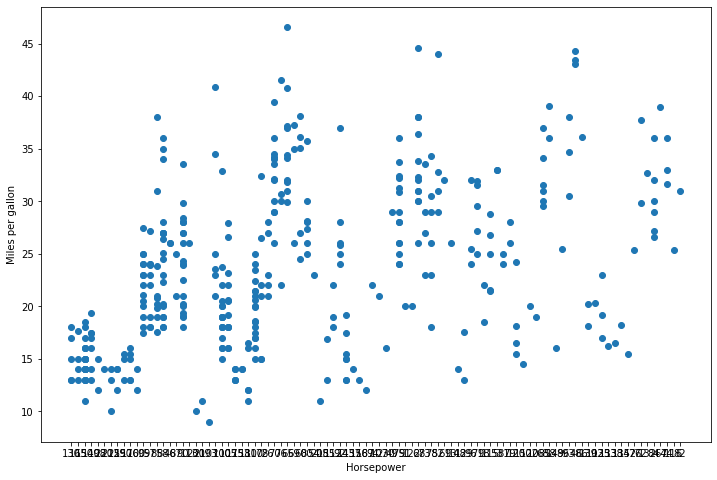

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

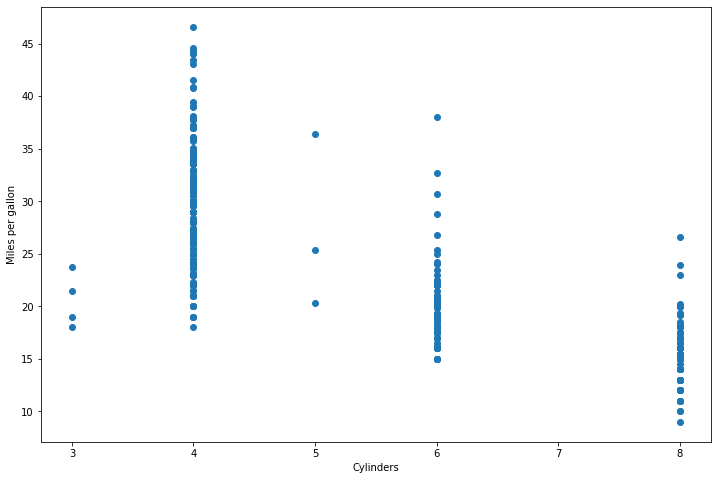

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [24]:
automobile_corr = automobile_df.corr()

automobile_corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


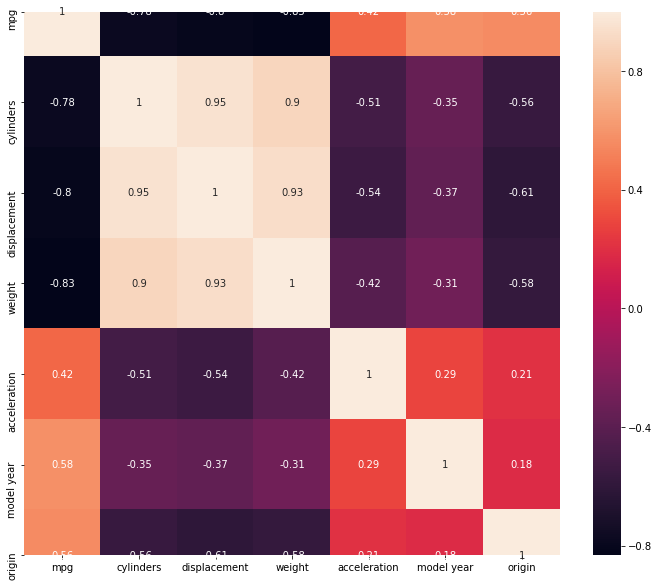

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True)

In [26]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,17.0,8,304.0,150,3672,11.5,72,1,amc ambassador sst
1,16.0,6,250.0,105,3897,18.5,75,1,chevroelt chevelle malibu
2,14.5,8,351.0,152,4215,12.8,76,1,ford gran torino
3,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw)
4,13.0,8,318.0,150,3755,14.0,76,1,dodge d100


In [46]:
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)

In [47]:
!ls datasets

'ls' is not recognized as an internal or external command,
operable program or batch file.
